In this project I want to find the estimated time spend by a user on social media based on their demographic data. 

### Requirements Installation

In [24]:
%pip install pandas numpy scikit-learn matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


### Importing Requirements and Data

Let us first import all the required packages.

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now let us import our data.

In [175]:
df = pd.read_csv("./data/time-wasted-on-social-media.csv")

We will change default behavior of pandas so that it will not truncate columns as there are lots of columns.

In [176]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [177]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType', 'id'],
      dtype='object')

### Data Exploration

Let us first explore data and find out which data features are worth keeping and which aren't to achieve our goal.

In [178]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,id
0,1,56.0-,Mle,Pakistan,$82812.000,True,True,job:engineer,rURAL,INSTAGRAM,80,17.0.0,4229,Pranks,24.0,7867.0.0,5,26.0.0,22.0,87:,Night,3.0.0,7.0.:,/Procrastination,Smrtphone,Android,9:00 PM,5.0.0,5.0.0,Commuting,Mobile-Data,1
1,2,46.0-,Fmle,xMexico,$27999.000,False,True,job:Artist,uRBAN,INSTAGRAM,228,14.0.0,2131,Pranks,19.0,5944.0.0,6,25.0.0,31.0,46:,Afternoon,5.0.0,5.0.:,/Habit,Computer,Android,5:00 PM,7.0.0,3.0.0,Atschool,Wi-Fi,2
2,3,32.0-,Fmle,xUnited States,$42436.000,False,True,job:engineer,rURAL,FACEBOOK,30,6.0.0,4367,Vlogs,19.0,8674.0.0,3,9.0.0,7.0,88:,Evening,6.0.0,4.0.:,/Entertainment,Tablett,Android,2:00 PM,8.0.0,2.0.0,Athome,Mobile-Data,3
3,4,60.0-,Mle,xBrazil,$62963.000,True,False,job:Waiting staff,rURAL,youtube,101,19.0.0,1507,Vlogs,4.0,2477.0.0,2,6.0.0,41.0,93:,Night,3.0.0,7.0.:,/Habit,Smrtphone,Android,9:00 PM,5.0.0,5.0.0,Commuting,Mobile-Data,4
4,5,25.0-,Mle,xPakistan,$22096.000,False,True,job:Manager,uRBAN,tiktok,136,6.0.0,2159,Gming,19.0,3093.0.0,7,13.0.0,21.0,4:,Morning,8.0.0,2.0.:,/Boredom,Smrtphone,iOS,8:00 AM,10.0.0,0.0.0,Athome,Mobile-Data,5


In [179]:
df.describe()

,UserID,Total Time Spent,Video ID,Video Length,Importance Score,Number of Videos Watched,id
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,500.646414,151.485060,4895.475100,15.192231,5.137450,25.210159,500.646414
std,288.452182,83.861021,2851.762232,8.231926,2.585918,14.028267,288.452182
min,1.000000,10.000000,11.000000,1.000000,1.000000,1.000000,1.000000
25%,251.750000,78.000000,2569.000000,8.000000,3.000000,14.000000,251.750000
50%,500.500000,152.500000,4720.500000,15.000000,5.000000,25.000000,500.500000
75%,750.250000,223.000000,7346.000000,22.000000,7.000000,37.000000,750.250000
max,1000.000000,298.000000,9997.000000,29.000000,9.000000,49.000000,1000.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    1004 non-null   int64  
 1   Age                       1004 non-null   object 
 2   Gender                    1004 non-null   object 
 3   Location                  1004 non-null   object 
 4   Income                    1004 non-null   object 
 5   Debt                      1004 non-null   bool   
 6   Owns Property             1004 non-null   bool   
 7   Profession                1004 non-null   object 
 8   Demographics              1004 non-null   object 
 9   Platform                  1004 non-null   object 
 10  Total Time Spent          1004 non-null   int64  
 11  Number of Sessions        1004 non-null   object 
 12  Video ID                  1004 non-null   int64  
 13  Video Category            1004 non-null   object 
 14  Video Le

### Data Cleaning

In [181]:
corr = df.corr(numeric_only=True)
corr

,UserID,Debt,Owns Property,Total Time Spent,Video ID,Video Length,Importance Score,Number of Videos Watched,id
UserID,1.000000,0.059113,0.082451,0.036535,0.002112,-0.035992,0.009502,0.001947,1.000000
Debt,0.059113,1.000000,0.005540,-0.016933,-0.006209,0.000363,0.006598,0.011549,0.059113
Owns Property,0.082451,0.005540,1.000000,-0.021724,-0.033039,0.075179,0.013324,-0.053226,0.082451
Total Time Spent,0.036535,-0.016933,-0.021724,1.000000,-0.017407,0.068119,-0.044007,-0.020857,0.036535
Video ID,0.002112,-0.006209,-0.033039,-0.017407,1.000000,-0.035146,0.011327,0.041680,0.002112
Video Length,-0.035992,0.000363,0.075179,0.068119,-0.035146,1.000000,-0.017869,0.038631,-0.035992
Importance Score,0.009502,0.006598,0.013324,-0.044007,0.011327,-0.017869,1.000000,-0.046008,0.009502
Number of Videos Watched,0.001947,0.011549,-0.053226,-0.020857,0.041680,0.038631,-0.046008,1.000000,0.001947
id,1.000000,0.059113,0.082451,0.036535,0.002112,-0.035992,0.009502,0.001947,1.000000


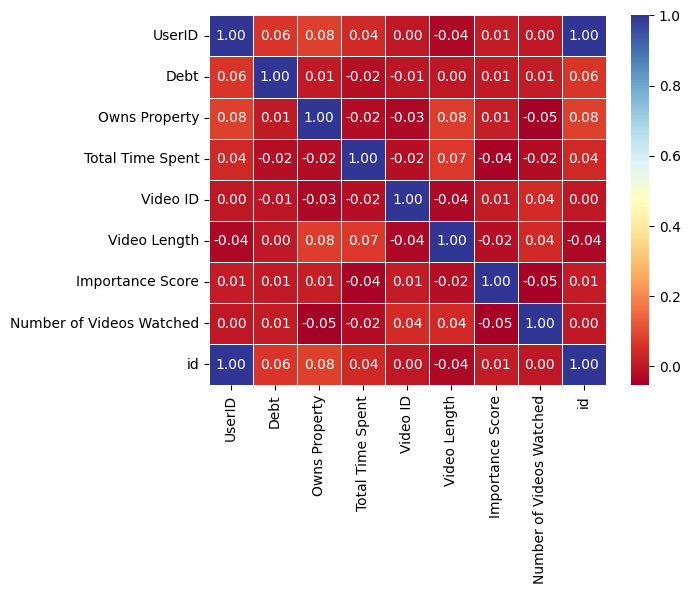

In [182]:
heatmap = sns.heatmap(corr, cmap="RdYlBu", annot=True, fmt=".2f", linewidths=0.5)


Now I will deal with null values (if any).

In [183]:
df.isna().value_counts()

UserID  Age    Gender  Location  Income  Debt   Owns Property  Profession  Demographics  Platform  Total Time Spent  Number of Sessions  Video ID  Video Category  Video Length  Engagement  Importance Score  Time Spent On Video  Number of Videos Watched  Scroll Rate  Frequency  ProductivityLoss  Satisfaction  Watch Reason  DeviceType  OS     Watch Time  Self Control  Addiction Level  CurrentActivity  ConnectionType  id   
False   False  False   False     False   False  False          False       False         False     False             False               False     False           False         False       False             False                False                     False        False      False             False         False         False       False  False       False         False            False            False           False    1004
Name: count, dtype: int64

Since there are no null values I will not have to deal with them.

Now let us remove the columns which will not add any value.

In [184]:
print(df["Self Control"].value_counts())
print(df["Addiction Level"].value_counts())
print(df["ProductivityLoss"].value_counts())

Self Control
8.0.0     248
5.0.0     230
10.0.0    180
7.0.0     159
9.0.0      62
3.0.0      55
6.0.0      36
4.0.0      34
Name: count, dtype: int64
Addiction Level
2.0.0    248
5.0.0    230
0.0.0    180
3.0.0    159
1.0.0     62
7.0.0     55
4.0.0     36
6.0.0     34
Name: count, dtype: int64
ProductivityLoss
6.0.0    247
3.0.0    230
5.0.0    158
8.0.0    145
7.0.0     62
1.0.0     55
9.0.0     37
4.0.0     36
2.0.0     34
Name: count, dtype: int64


In [ ]:
useless_cols = [
    "UserID",
    "Video Category"
    "Platform",
    "Engagement",
    "Importance Score",
    "Video ID",
    "Time Spent On Video",
    "Scroll Rate",
    "Frequency",
    "Satisfaction",
    "CurrentActivity",
    "Watch Time",
    "id",
    "Video Length",
    "ProductivityLoss"
]
df.drop(columns=useless_cols, inplace=True)


We have now dropped all the useless columns which are not useful in out current task.
Here I have created a list of columns based on their data type for further use.

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1003
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       994 non-null    int64  
 1   Gender                    994 non-null    object 
 2   Location                  994 non-null    object 
 3   Income                    994 non-null    float64
 4   Debt                      994 non-null    int64  
 5   Owns Property             994 non-null    int64  
 6   Profession                994 non-null    object 
 7   Demographics              994 non-null    object 
 8   Total Time Spent          994 non-null    int64  
 9   Number of Sessions        994 non-null    float64
 10  Number of Videos Watched  994 non-null    float64
 11  Watch Reason              994 non-null    object 
 12  DeviceType                994 non-null    object 
 13  OS                        994 non-null    object 
 14  Self Control  

In [238]:
text_cols = [
    "Age",
    "Gender",
    "Location",
    "Income",
    "Profession",
    "Demographics",
    "Number of Sessions",
    "Watch Reason",
    "DeviceType",
    "OS",
    "Self Control",
    "Addiction Level",
    "ConnectionType",
]
int_cols = [
    "Total Time Spent",
    "Number of Videos Watched",
]
boolean_cols = [
    "Debt",
    "Owns Property",
]

# Making sure all the columns are included.
len(text_cols + int_cols + boolean_cols) == len(df.columns)

True

Now we will have to clean and pre-process data for further use. We will need to pre process the following columns,

**A. Convert the following columns into numerical formats.**
1. Age
2. Income
3. Number of Sessions
4. Self Control
5. Addiction Level
6. Debt
7. Owns Property

**B. We will also have prepare these columns for one hot encoding,**
1. Gender
2. Location  (Also remove leading `x` in some records)
3. Profession
4. Demographics
5. Watch Reason
6. DeviceType
7. OS
8. ConnectionType


In [206]:
# Converting all the Age to numerical values.
df["Age"] = df["Age"].astype(str).apply(lambda x: x.replace(".0-", ""))
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"] = df["Age"].fillna(0)
df["Age"] = df["Age"].astype(int)
df = df[df["Age"] != 0]

In [210]:
# Converting all the Income to Numerical values.
df["Income"] = df["Income"].astype(str).apply(lambda x: x.replace("$", ""))
df["Income"] = pd.to_numeric(df["Income"])
df["Income"].describe()

count      994.000000
mean     59552.042254
std      23786.782183
min      20138.000000
25%      38531.250000
50%      58805.000000
75%      80046.250000
max      99676.000000
Name: Income, dtype: float64

In [208]:
df["Income"].describe()

count      994.000000
mean     59552.042254
std      23786.782183
min      20138.000000
25%      38531.250000
50%      58805.000000
75%      80046.250000
max      99676.000000
Name: Income, dtype: float64

In [ ]:
# We will convert `Number of Sessions`, `Self Control`, and `Addiction Level`into numerical values simultaneously as they possess same type.

def convert_into_num(x):
    return x.replace("0.0", "")

df["Number of Sessions"] = df["Number of Sessions"].astype(str).apply(convert_into_num)
df["Self Control"] = df["Self Control"].astype(str).apply(convert_into_num)
df["Addiction Level"] = df["Addiction Level"].astype(str).apply(convert_into_num)

df["Number of Sessions"] = pd.to_numeric(df["Number of Sessions"])
df["Self Control"] = pd.to_numeric(df["Self Control"])
df["Addiction Level"] = pd.to_numeric(df["Addiction Level"])

In [233]:
df["Debt"] = df["Debt"].apply(lambda x: x == 1 if x else 0)
df["Owns Property"] = df["Owns Property"].apply(lambda x: x == 1 if x else 0)
df["Debt"] = pd.to_numeric(df["Debt"])
df["Owns Property"] = pd.to_numeric(df["Owns Property"])

In [234]:
df.describe()

,Age,Income,Debt,Owns Property,Total Time Spent,Number of Sessions,Number of Videos Watched,ProductivityLoss,Self Control,Addiction Level
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,817.000000
mean,40.969819,59552.042254,0.598592,0.542254,151.769618,9.476861,25.153924,5.128773,5.483903,3.544676
std,13.550365,23786.782183,0.490430,0.498462,83.965035,5.816770,14.017664,2.125356,2.601464,1.711631
min,18.000000,20138.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,29.000000,38531.250000,0.000000,0.000000,79.000000,4.000000,14.000000,3.000000,4.000000,2.000000
50%,42.000000,58805.000000,1.000000,1.000000,153.000000,9.000000,25.000000,5.000000,6.000000,3.000000
75%,52.000000,80046.250000,1.000000,1.000000,223.000000,15.000000,37.000000,6.000000,8.000000,5.000000
max,64.000000,99676.000000,1.000000,1.000000,298.000000,19.000000,49.000000,9.000000,9.000000,7.000000


We have successfully converted all the object types to numeric values, now we will need to prepare the rest of columns for pre-processing.

In [229]:
df[["Gender",
"Location",
"Profession",
"Demographics",
"Watch Reason",
"DeviceType",
"OS",
"ConnectionType",]].head()

,Gender,Location,Profession,Demographics,Watch Reason,DeviceType,OS,ConnectionType
0,male,pakistan,engineer,rural,rocrastination,smartphone,android,mobile_data
1,female,mexico,artist,urban,abit,computer,android,wi_fi
2,female,united_states,engineer,rural,ntertainment,tablet,android,mobile_data
3,male,brazil,waiting_staff,rural,abit,smartphone,android,mobile_data
4,male,pakistan,manager,urban,oredom,smartphone,ios,mobile_data


In [214]:
# Gender
df["Gender"] = df["Gender"].apply(lambda x: x.replace("Fmle", "female"))
df["Gender"] = df["Gender"].apply(lambda x: x.replace("Mle", "male"))
df["Gender"] = df["Gender"].apply(lambda x: x.replace("Other", "others"))
df["Gender"].value_counts()

Gender
male      508
female    322
others    164
Name: count, dtype: int64

In [215]:
def clean_country_name(x):
    if (x[0] == "x"):
        x = x[1:]
    x = x.replace(" ", "_")
    x = x.lower()
    return x

df["Location"] = df["Location"].apply(clean_country_name)
df["Location"].value_counts()

Location
india            221
united_states    175
vietnam           82
philippines       79
brazil            77
pakistan          76
japan             76
indonesia         75
mexico            73
germany           60
Name: count, dtype: int64

In [216]:
def clean_profession(x):
    x = x.replace("job:", "")
    x = x.replace(" ", "_")
    x = x.lower()
    return x

df["Profession"] = df["Profession"].apply(clean_profession)
df["Profession"].value_counts()

Profession
students         246
waiting_staff    192
labor/worker     183
driver           113
engineer          65
cashier           55
manager           54
artist            47
teacher           39
Name: count, dtype: int64

In [217]:
df["Demographics"] = df["Demographics"].apply(lambda x: x.lower())
df["Demographics"].value_counts()

Demographics
rural    739
urban    255
Name: count, dtype: int64

In [222]:
df["Watch Reason"] = df["Watch Reason"].apply(lambda x: x[1:].lower())
df["Watch Reason"].value_counts()

Watch Reason
abit              339
oredom            274
ntertainment      262
rocrastination    119
Name: count, dtype: int64

In [224]:
def clean_device_type(x):
    x = x.replace("Smrtphone", "smartphone")
    x = x.replace("Tablett", "tablet")
    x = x.replace("Computer", "computer")
    return x
df["DeviceType"] = df["DeviceType"].apply(clean_device_type)
df["DeviceType"].value_counts()

DeviceType
smartphone    582
tablet        281
computer      131
Name: count, dtype: int64

In [226]:
df["OS"] = df["OS"].apply(lambda x: x.lower())
df["OS"].value_counts()

OS
android    497
ios        259
windows    123
macos      115
Name: count, dtype: int64

In [ ]:
df["ConnectionType"] = df["ConnectionType"].apply(lambda x: x.replace("Wi-Fi","wifi").replace("-", "_").lower())
df["ConnectionType"].value_counts()

ConnectionType
mobile_data    681
wifi           313
Name: count, dtype: int64

In [239]:
df.head()

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Total Time Spent,Number of Sessions,Number of Videos Watched,Watch Reason,DeviceType,OS,Self Control,Addiction Level,ConnectionType
0,56,male,pakistan,82812.0,1,1,engineer,rural,80,17.0,22.0,rocrastination,smartphone,android,5.0,5.0,mobile_data
1,46,female,mexico,27999.0,0,1,artist,urban,228,14.0,31.0,abit,computer,android,7.0,3.0,wi_fi
2,32,female,united_states,42436.0,0,1,engineer,rural,30,6.0,7.0,ntertainment,tablet,android,8.0,2.0,mobile_data
3,60,male,brazil,62963.0,1,0,waiting_staff,rural,101,19.0,41.0,abit,smartphone,android,5.0,5.0,mobile_data
4,25,male,pakistan,22096.0,0,1,manager,urban,136,6.0,21.0,oredom,smartphone,ios,1.0,NaN,mobile_data


Now we will make all the column names look proper and remove unncessary white spaces to prevent any issues in future

In [245]:
df = df.rename(str.lower, axis='columns')
df.columns

Index(['age', 'gender', 'location', 'income', 'debt', 'owns property',
       'profession', 'demographics', 'total time spent', 'number of sessions',
       'number of videos watched', 'watch reason', 'devicetype', 'os',
       'self control', 'addiction level', 'connectiontype'],
      dtype='object')

In [ ]:
new_cols = {
    "owns property": "owns_property",
    "total time spent": "total_time_spent",
    "number of sessions": "number_of_sessions",
    "number of videos watched": "number_of_videos_watched",
    "watch reason": "watch_reason",
    "devicetype": "device_type",
    "self control": "self_control",
    "addiction level": "addiction_level",
    "connectiontype": "connection_type",
}

df = df.rename(new_cols, axis="columns")
df.columns

Index(['age', 'gender', 'location', 'income', 'debt', 'owns_property',
       'profession', 'demographics', 'total_time_spent', 'number_of_sessions',
       'number_of_videos_watched', 'watch_reason', 'device_type', 'os',
       'self_control', 'addiction_level', 'connection_type'],
      dtype='object')

### Pre-processing 
Now let us create a pre-processing pipeline in sklearn to pre-process this data,